In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data loading

In [2]:
df = pd.read_csv("ticket_service.csv")

In [3]:
df.head()

,Ticket_ID,Issue_Type,Priority,Resolution_Time_Hours
0,TICKET_0001,Network Issue,High,4.69
1,TICKET_0002,Network Issue,High,30.10
2,TICKET_0003,Software Bug,Critical,13.17
3,TICKET_0004,Hardware Failure,Medium,9.13
4,TICKET_0005,Hardware Failure,Critical,1.70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ticket_ID              1000 non-null   object 
 1   Issue_Type             1000 non-null   object 
 2   Priority               1000 non-null   object 
 3   Resolution_Time_Hours  1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Resolution_Time_Hours
count,1000.000000
mean,9.725100
std,9.725104
min,0.050000
25%,2.692500
50%,6.870000
75%,13.635000
max,81.720000


In [6]:
df.isnull().sum()

Ticket_ID                0
Issue_Type               0
Priority                 0
Resolution_Time_Hours    0
dtype: int64

In [7]:
df.shape

(1000, 4)

In [8]:
print(df.isnull().sum())

Ticket_ID                0
Issue_Type               0
Priority                 0
Resolution_Time_Hours    0
dtype: int64


# Data cleaning

In [9]:
#Remove duplicates
df = df.drop_duplicates()

In [10]:
df

,Ticket_ID,Issue_Type,Priority,Resolution_Time_Hours
0,TICKET_0001,Network Issue,High,4.69
1,TICKET_0002,Network Issue,High,30.10
2,TICKET_0003,Software Bug,Critical,13.17
3,TICKET_0004,Hardware Failure,Medium,9.13
4,TICKET_0005,Hardware Failure,Critical,1.70
...,...,...,...,...
995,TICKET_0996,User Request,Critical,0.96
996,TICKET_0997,Software Bug,Low,24.93
997,TICKET_0998,Security Breach,Medium,1.47
998,TICKET_0999,Software Bug,Low,30.00


# Handling outliers

In [11]:
#Outliers in 'Resolution_Time_Hours' column
def is_outlier(col, data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound,upper_bound)
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

outliers = is_outlier('Resolution_Time_Hours', df.copy())
print(outliers)


-13.721250000000001 30.04875
       Ticket_ID        Issue_Type  Priority  Resolution_Time_Hours
1    TICKET_0002     Network Issue      High                  30.10
11   TICKET_0012     Network Issue    Medium                  35.04
34   TICKET_0035      Software Bug       Low                  33.71
50   TICKET_0051      Software Bug  Critical                  34.93
69   TICKET_0070  Hardware Failure    Medium                  43.34
139  TICKET_0140      Software Bug    Medium                  35.68
140  TICKET_0141   Security Breach  Critical                  32.82
154  TICKET_0155   Security Breach  Critical                  42.44
226  TICKET_0227      User Request    Medium                  36.12
241  TICKET_0242  Hardware Failure  Critical                  30.78
247  TICKET_0248   Security Breach       Low                  34.01
248  TICKET_0249     Network Issue  Critical                  33.14
261  TICKET_0262  Hardware Failure  Critical                  46.11
305  TICKET_0306   

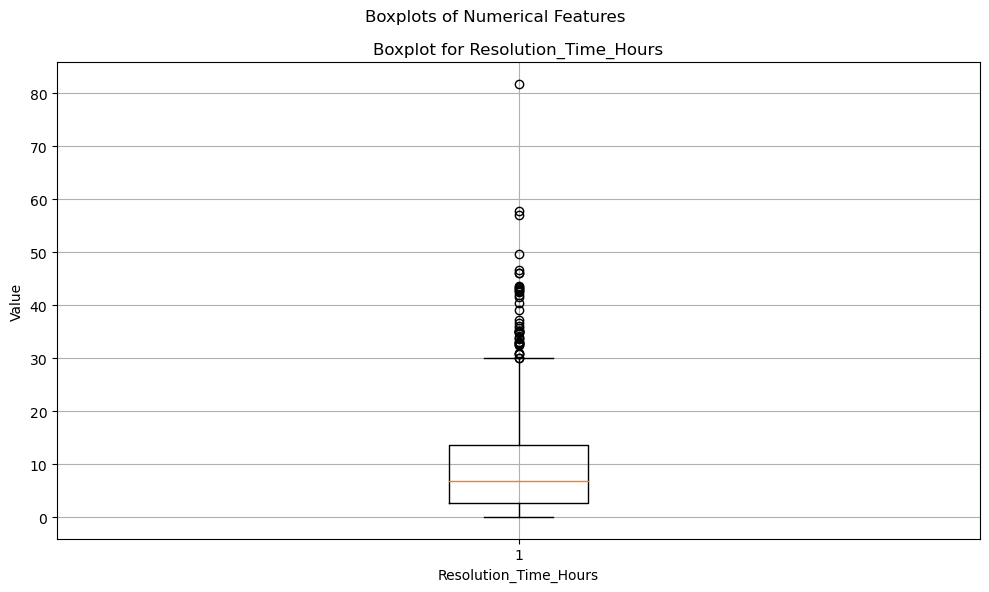

In [12]:
#Finding outliers using data visualization technique(boxplot)
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))  

# Create boxplots for Resolution_Time_Hours column
plt.subplot(1, 1, 1) 
plt.boxplot(df['Resolution_Time_Hours'])
plt.xlabel('Resolution_Time_Hours')
plt.ylabel('Value')
plt.title(f'Boxplot for Resolution_Time_Hours')


plt.grid(True)
plt.suptitle('Boxplots of Numerical Features')
plt.tight_layout()
plt.show()

# Creating / doing one-hot encoding

In [13]:
numerical_cols=['Resolution_Time_Hours']
categorical_cols=['Issue_Type','Priority']

In [14]:
# import StandardScaler and OneHotEncoder from sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate numerical and categorical data
numerical_data = df[numerical_cols]
categorical_data = df[categorical_cols]

# Encode categorical variables (one-hot encoding)
encoder = OneHotEncoder(sparse=False)  # Drop first category to avoid dummy trap
encoded_data = encoder.fit_transform(categorical_data)

# Combine transformed data
transformed_data =pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


# Now you have your transformed data in 'transformed_data' DataFrame
transformed_data


C:\Users\vedas\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Issue_Type_Hardware Failure,Issue_Type_Network Issue,Issue_Type_Security Breach,Issue_Type_Software Bug,Issue_Type_User Request,Priority_Critical,Priority_High,Priority_Low,Priority_Medium
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Data Visualization

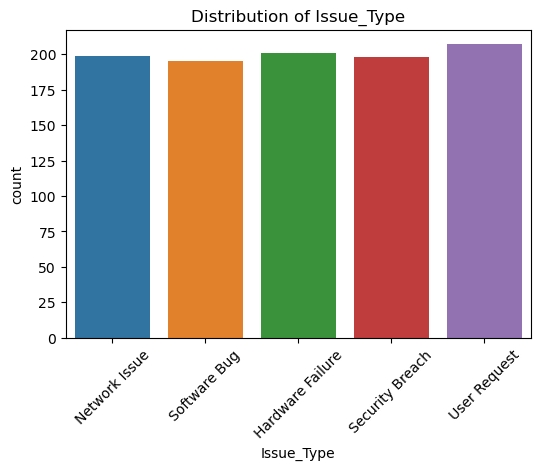

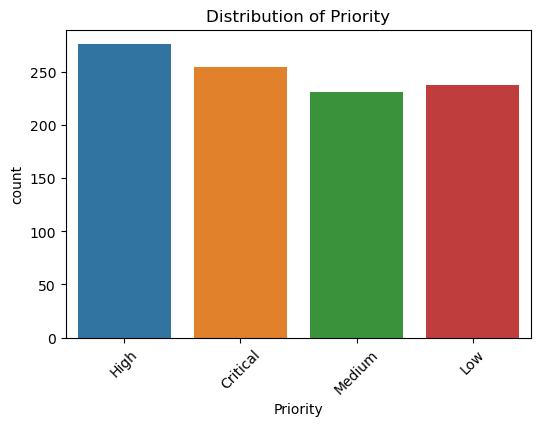

In [15]:
# Count Plots (categorical features)
# Create count plots to visualize the distribution of categorical features
for col in categorical_cols:
  plt.figure(figsize=(6, 4))
  sns.countplot(x=col, data=df)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)  # Rotate x-axis labels for readability
  plt.show()


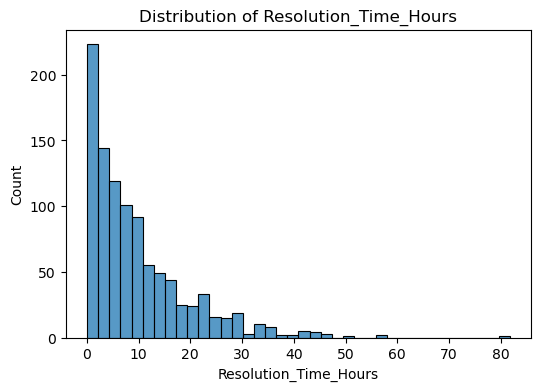

In [16]:
#histplots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\vedas\AppData\Local\Temp\ipykernel_36384\1879391359.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Resolution_Time_Hours'])


<Axes: xlabel='Resolution_Time_Hours', ylabel='Density'>

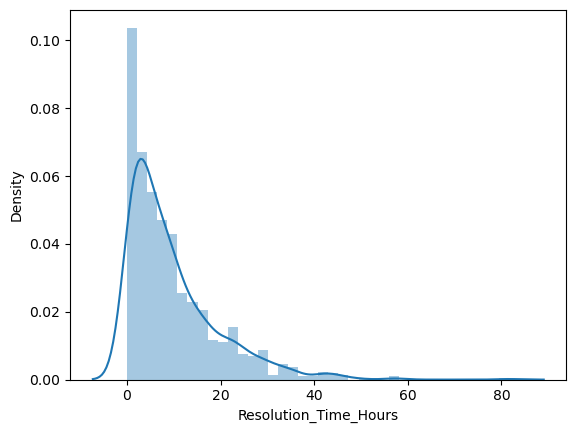

In [17]:
sns.distplot(df['Resolution_Time_Hours'])

# Building Model

In [18]:
features = [ "Issue_Type", "Priority"] 
target = "Resolution_Time_Hours"

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_data, df[target], test_size=0.2)

In [20]:
# Create a linear regression model
model = LinearRegression()


In [21]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the testing set
predictions = model.predict(X_test)


In [23]:
print(predictions)

[ 9.671875  7.578125  7.40625   9.6875    9.6875    9.6875   11.140625
 10.296875 10.296875 10.84375   9.375     7.40625   9.046875  9.984375
  8.828125  9.359375  8.21875   9.375     9.984375  8.671875  9.046875
  9.484375  9.046875  8.046875  8.046875  8.046875 10.84375   9.203125
 10.796875  7.40625  10.515625 10.296875 10.296875 10.296875  7.578125
  8.71875  10.296875  9.6875    9.984375  9.984375 10.84375   8.046875
  8.046875 10.84375   8.71875   9.484375  8.71875   7.40625  10.515625
  8.21875   8.828125  9.203125  8.828125  9.6875    9.375     7.40625
  9.203125  9.046875 10.296875  9.375     7.578125 10.515625 10.296875
 10.796875  9.484375  8.046875  9.203125  8.828125  7.578125  9.375
  8.71875   8.046875  8.671875  8.046875  9.375     8.828125  8.046875
 10.515625  7.40625   9.484375 10.296875  9.046875  8.21875  10.796875
  9.671875 10.515625  9.671875  9.484375  8.671875 10.296875  8.828125
 10.796875  9.484375  9.203125  7.40625   7.40625   8.71875  10.84375
  9.6875   

In [27]:
# Example of raw data with categorical features
raw_data = [['Issue_Type_Hardware Failure', 'Priority_High']] 

# Define the encoder and fit it to your categories
encoder = OneHotEncoder()
encoder.fit([['Issue_Type_Hardware Failure', 'Priority_Critical'],
             ['Issue_Type_Network Issue', 'Priority_High'],
             ['Issue_Type_Security Breach', 'Priority_Low'],
             ['Issue_Type_Software Bug', 'Priority_Medium'],
             ['Issue_Type_User Request', 'Priority_Critical'],
             # Add all unique categories present in your training data
            ])

# Transform the raw data to one-hot encoded numeric format
encoded_data = encoder.transform(raw_data).toarray()

# Ensure the data is in the correct shape (1 sample, n features)
encoded_data = encoded_data.reshape(1, -1)

# Predict using the model
predicted_resolution_time = model.predict(encoded_data)[0]

print("Predicted resolution time for the new ticket:", predicted_resolution_time,"hrs")


Predicted resolution time for the new ticket: 7.40625 hrs


C:\Users\vedas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
# Example of 10 raw data points with categorical features
raw_data = [
    ['Issue_Type_Hardware Failure', 'Priority_High'],
    ['Issue_Type_Network Issue', 'Priority_Critical'],
    ['Issue_Type_Security Breach', 'Priority_Low'],
    ['Issue_Type_Software Bug', 'Priority_Medium'],
    ['Issue_Type_User Request', 'Priority_High'],
    ['Issue_Type_Hardware Failure', 'Priority_Medium'],
    ['Issue_Type_Network Issue', 'Priority_Low'],
    ['Issue_Type_Security Breach', 'Priority_High'],
    ['Issue_Type_Software Bug', 'Priority_Critical'],
    ['Issue_Type_User Request', 'Priority_Low']
]

# Define the encoder and fit it to your categories
encoder = OneHotEncoder()
encoder.fit([
    ['Issue_Type_Hardware Failure', 'Priority_Critical'],
    ['Issue_Type_Network Issue', 'Priority_High'],
    ['Issue_Type_Security Breach', 'Priority_Low'],
    ['Issue_Type_Software Bug', 'Priority_Medium'],
    ['Issue_Type_User Request', 'Priority_Critical'],
])

# Transform the raw data to one-hot encoded numeric format
encoded_data = encoder.transform(raw_data).toarray()

# Predict using the model
predicted_resolution_times = model.predict(encoded_data)

# Print the predicted resolution times for the new tickets
for i, prediction in enumerate(predicted_resolution_times):
    print(f"Predicted resolution time for ticket {i+1}: {prediction} hrs")


Predicted resolution time for ticket 1: 7.40625 hrs
Predicted resolution time for ticket 2: 9.375 hrs
Predicted resolution time for ticket 3: 9.984375 hrs
Predicted resolution time for ticket 4: 9.6875 hrs
Predicted resolution time for ticket 5: 9.484375 hrs
Predicted resolution time for ticket 6: 9.046875 hrs
Predicted resolution time for ticket 7: 10.515625 hrs
Predicted resolution time for ticket 8: 8.671875 hrs
Predicted resolution time for ticket 9: 8.21875 hrs
Predicted resolution time for ticket 10: 10.796875 hrs


C:\Users\vedas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 142.8987442792969
Mean Absolute Error: 8.235909375
R-squared: -0.05242130180658844
